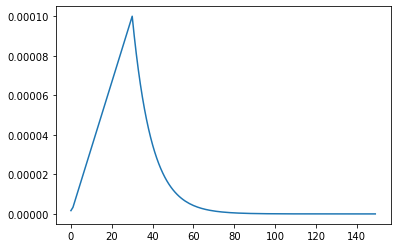

In [3]:
import matplotlib.pyplot as plt
import torch
from schedular import WarmupMultiStepLR, WarmupExponentialLR, WarmupCosineAnnealingLR
from torch.nn.parameter import Parameter
import numpy as np


model = [Parameter(torch.randn(2, 2, requires_grad=True))]

lr=0.0001
warmup_factor = lr / 100.
optimizer = torch.optim.Adam(
    model, lr=lr,
    betas=(0.9, 0.98), weight_decay=0.01)

# lr_scheduler = WarmupExponentialLR(optimizer, [2,4], warmup_factor=0.0, warmup_iters=10)
lr_scheduler = WarmupExponentialLR(optimizer, gamma=0.9,warmup_epochs=30)
# lr_scheduler = WarmupCosineAnnealingLR(optimizer, T_max=20,warmup_epochs=20)

lrs = []
for i in range(150):
    curr_lr = optimizer.param_groups[0]['lr']
    # print('{}, {:.8f}'.format(i, curr_lr))
    lrs.append(curr_lr)
    lr_scheduler.step()

lrs = np.array(lrs)
plt.plot(lrs)
plt.show()